In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data=pd.read_csv("/content/digital_marketing_campaign_dataset.csv.zip")
print(data)

      CustomerID  Age  Gender  Income CampaignChannel   CampaignType  \
0           8000   56  Female  136912    Social Media      Awareness   
1           8001   69    Male   41760           Email      Retention   
2           8002   46  Female   88456             PPC      Awareness   
3           8003   32  Female   44085             PPC     Conversion   
4           8004   60  Female   83964             PPC     Conversion   
...          ...  ...     ...     ...             ...            ...   
7995       15995   21    Male   24849           Email      Awareness   
7996       15996   43  Female   44718             SEO      Retention   
7997       15997   28  Female  125471        Referral  Consideration   
7998       15998   19  Female  107862             PPC  Consideration   
7999       15999   31  Female   93002           Email      Awareness   

          AdSpend  ClickThroughRate  ConversionRate  WebsiteVisits  \
0     6497.870068          0.043919        0.088031              

In [23]:
# Prints number of rows and columns in the dataset
print(data.shape)
# Prints all column names
print(data.columns)
# Displays the first 7 rows of the dataset
print(data.head(7))
# Displays the last 5 rows of the dataset
print(data.tail(5))
# Randomly displays 2 rows from the dataset
print(data.sample(n=2))



(8000, 20)
Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')
   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   
5        8005   25  Female   42925    Social Media    Awareness  9579.388247   
6        8006   38  Female   25615        Referral    Aware

In [8]:
# Prints a concise summary of the dataset, including column types and non-null counts
print(data.info())
# Shows statistical summary of numeric columns
print(data.describe().all)
# Returns a dataframe with boolean values indicating missing data
print(data.isnull())
# Shows total count of missing values in each column
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

Mean Income: 84664.19675
Median Age: 43.0
Overall Conversion Rate (%): 87.64999999999999


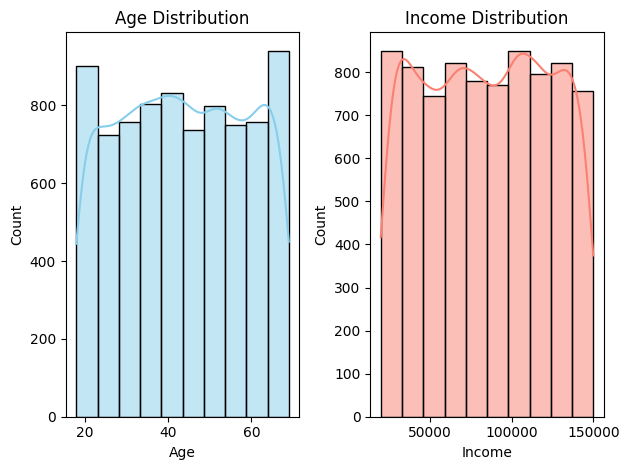

<ipython-input-18-3913385148>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_conversion.index, y=channel_conversion.values, palette='viridis')


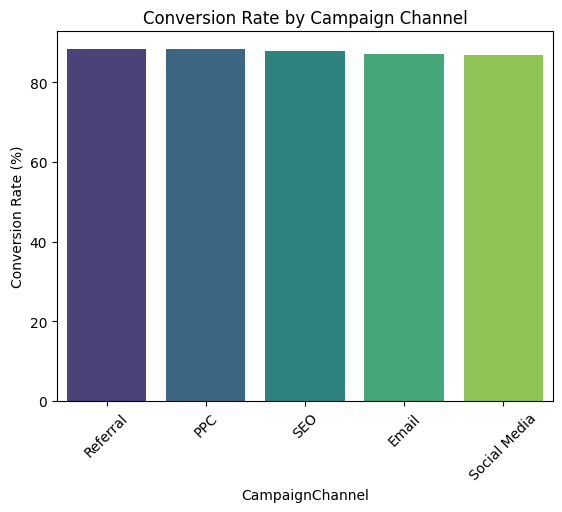

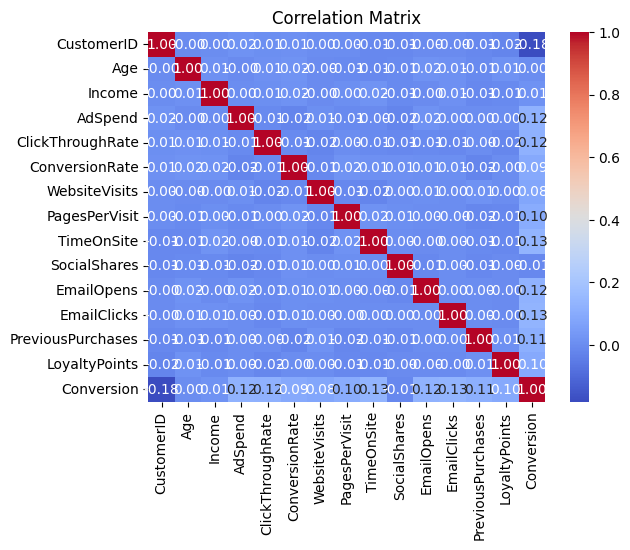

<ipython-input-18-3913385148>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Conversion', y='AdSpend', data=data, palette='Set2')


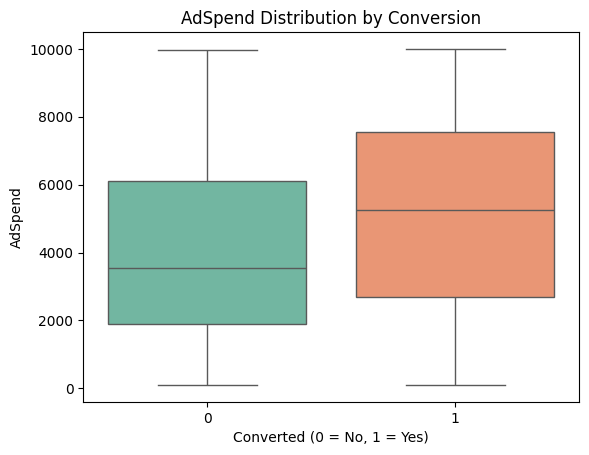

<ipython-input-18-3913385148>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_conversion.index, y=platform_conversion.values, palette='mako')


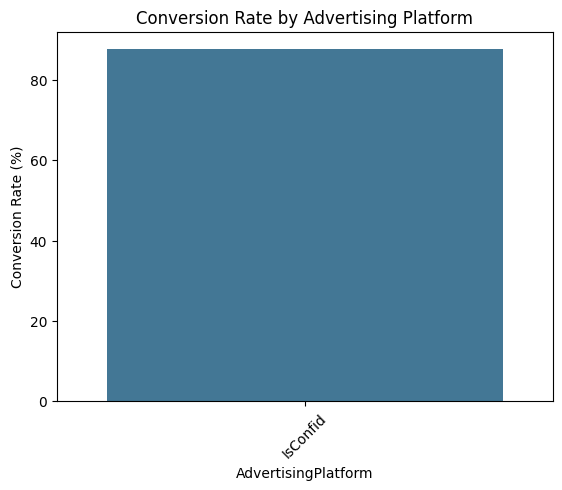

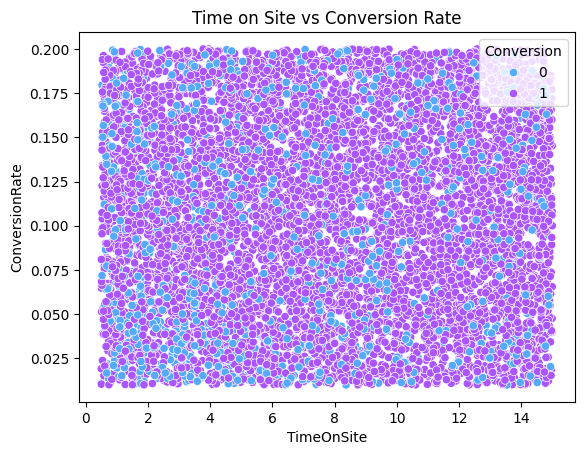

In [18]:


sample_data = data.head(10)

==
# 1. Basic Statistics using NumPy

mean_income = np.mean(data['Income'])
median_age = np.median(data['Age'])
conversion_rate = np.mean(data['Conversion']) * 100
print("Mean Income:", mean_income)
print("Median Age:", median_age)
print("Overall Conversion Rate (%):", conversion_rate)


# 2. Distribution of Age and Income

plt.subplot(1, 2, 1)
sns.histplot(data['Age'], kde=True, bins=10, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['Income'], kde=True, bins=10, color='salmon')
plt.title('Income Distribution')
plt.tight_layout()
plt.show()


# 3. Conversion Rate by Campaign Channel

channel_conversion = data.groupby('CampaignChannel')['Conversion'].mean().sort_values(ascending=False) * 100
sns.barplot(x=channel_conversion.index, y=channel_conversion.values, palette='viridis')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate by Campaign Channel')
plt.xticks(rotation=45)
plt.show()


# 4. Correlation Heatmap

numeric_cols = data.select_dtypes(include=[np.number])
correlation = numeric_cols.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 5. Boxplot of AdSpend vs Conversion

sns.boxplot(x='Conversion', y='AdSpend', data=data, palette='Set2')
plt.title('AdSpend Distribution by Conversion')
plt.xlabel('Converted (0 = No, 1 = Yes)')
plt.ylabel('AdSpend')
plt.show()


# 6. Conversion Rate by Advertising Platform

platform_conversion = data.groupby('AdvertisingPlatform')['Conversion'].mean().sort_values(ascending=False) * 100
sns.barplot(x=platform_conversion.index, y=platform_conversion.values, palette='mako')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate by Advertising Platform')
plt.xticks(rotation=45)
plt.show()



# 7. Scatterplot: Time on Site vs Conversion Rate

sns.scatterplot(x='TimeOnSite', y='ConversionRate', hue='Conversion', data=data, palette='cool')
plt.title('Time on Site vs Conversion Rate')
plt.show()
